#**Bank Marketing Dataset**

##Importing Libraries

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns

import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn

import os



##Reading Dataset

In [325]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank/bank-full.csv')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##Setting random state equal to 0
### To ensure output is same for everyone who runs this notebook

In [326]:

np.random.seed(0)


In [327]:
sns.set(style='white', context='notebook', palette='deep')

In [328]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [329]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##Checking for duplicate values

In [330]:
print('Duplicate values in the bank-full dataset are: ', df1.duplicated().sum())


Duplicate values in the bank-full dataset are:  0


##Dropping duplicate values

In [331]:
df1.drop_duplicates(inplace=True)


##Verify whether duplicate values are removed or not 

In [332]:
print('Duplicate values in the bank-full dataset are: ', df1.duplicated().sum())


Duplicate values in the bank-full dataset are:  0


##Checking whether we have missing values or not?

In [333]:
print(df1.isnull().sum().sum())



0


##Check whether data is balanced or not 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


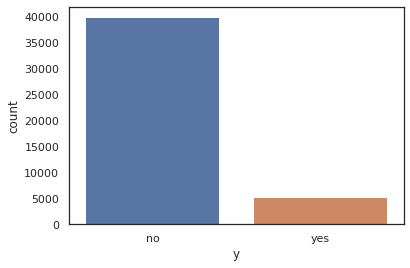

In [334]:
sns.countplot('y',data=df1)

Number of 'No' : 39922


Number of 'Yes' : 5289


Which means the data is unbalanced. We will balance it using upsampling technique

##Balancing the data using over sampling


In [335]:
##sns.pairplot(df1, hue='y')

In [336]:
df1_classe_majority = df1[df1.y=='no'] 
df1_classe_minority = df1[df1.y=='yes']
print(df1_classe_majority.shape)
print(df1_classe_minority.shape)



(39922, 17)
(5289, 17)


In [337]:
# Upsample of minority class
from sklearn.utils import resample
df1_classe_minority_upsampled = resample(df1_classe_minority,
                                           replace = True,
                                           n_samples = 39922)

In [338]:
df1_classe_minority_upsampled.shape

(39922, 17)

In [339]:
df1_balanced_data = pd.concat([df1_classe_majority, df1_classe_minority_upsampled])
df1_balanced_data.shape

(79844, 17)

## Now check whether data got balanced or not by visualizing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


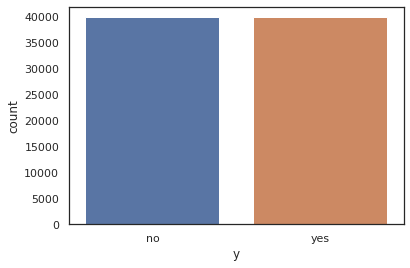

In [340]:
sns.countplot('y',data=df1_balanced_data)

##Label encoding

In [341]:
df1_balanced_data.loan = df1_balanced_data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df1_balanced_data.housing = df1_balanced_data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df1_balanced_data.default = df1_balanced_data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_var =["job", "marital", "education", "contact", "month", "poutcome","y"]
for i in cat_var:
  df1_balanced_data[i]= le.fit_transform(df1_balanced_data[i])



In [342]:
df1_balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,1,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,1,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,1,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,1,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,1,1,0,0,2,5,8,198,1,-1,0,3,0


###EDA

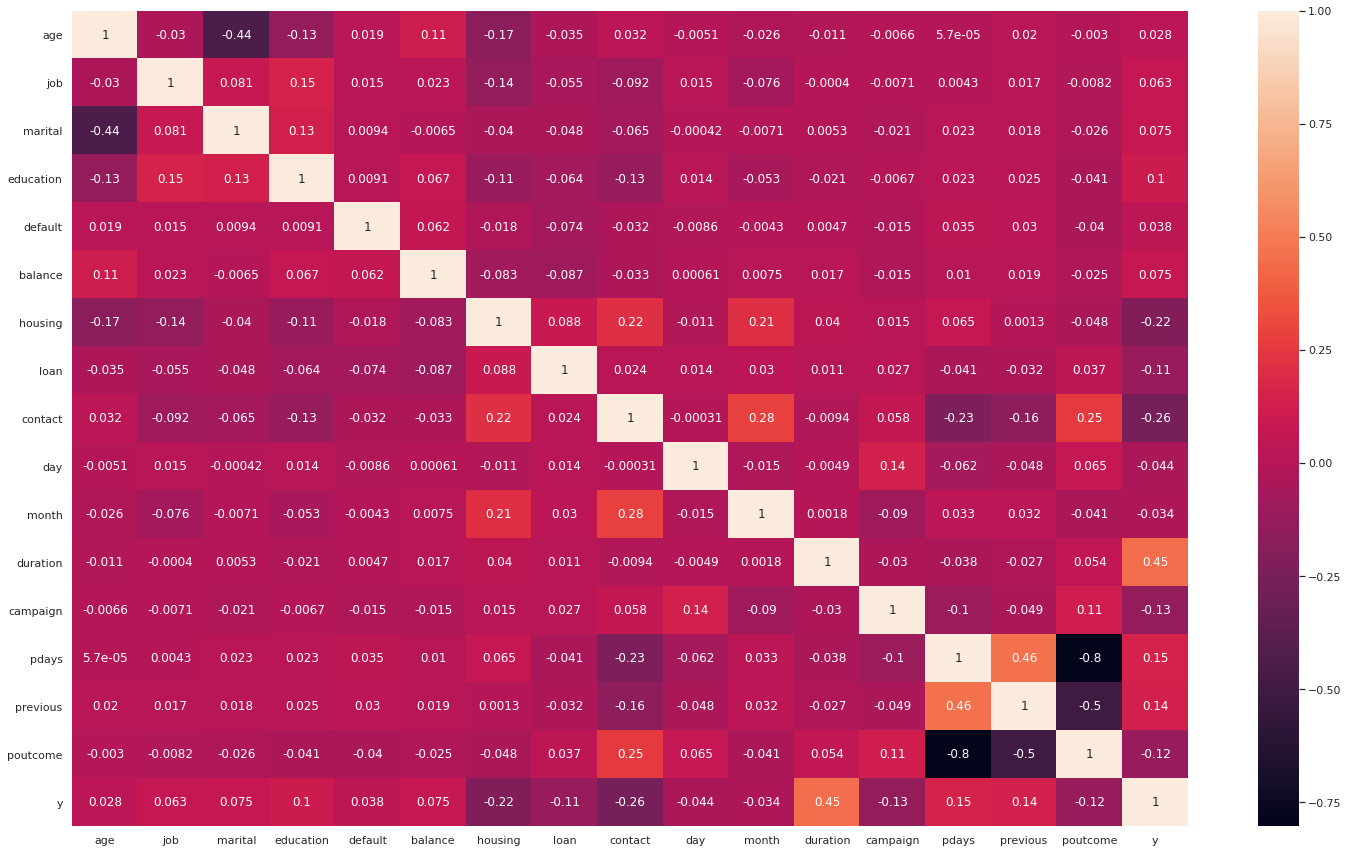

In [343]:
plt.figure(figsize=(25,15))
sns.heatmap(df1_balanced_data.corr(), annot=True)

###Assigning input feature to x and output feature to y

In [344]:
x = df1_balanced_data.iloc[:,:-1]
y = df1_balanced_data.iloc[:,-1]


### Scaling the input data

In [345]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


##Splitting into Test and Train dataset

In [346]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(55890, 16)
(23954, 16)
(55890,)
(23954,)


In [347]:
# Further splitting the training data in trian and validation 

feature_train, feature_val, label_train, label_val = train_test_split(x_train, y_train, test_size = 0.1)

## Building model

In [348]:
model = Sequential()

model.add(Dense(16, input_dim=16, activation='relu', name= 'input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64,  activation='relu', name= 'hidden_2'))
model.add(Dense(128, activation='relu', name= 'hidden_3'))
model.add(Dense(256,  activation='relu', name= 'hidden_4'))
model.add(Dense(512, activation='relu', name= 'hidden_5'))
model.add(Dense(1, input_dim=16, activation='sigmoid', name= 'output'))

## Adding optimizer

In [349]:
opt = Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])

##Model Summary

In [350]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                272       
_________________________________________________________________
hidden_1 (Dense)             (None, 32)                544       
_________________________________________________________________
hidden_2 (Dense)             (None, 64)                2112      
_________________________________________________________________
hidden_3 (Dense)             (None, 128)               8320      
_________________________________________________________________
hidden_4 (Dense)             (None, 256)               33024     
_________________________________________________________________
hidden_5 (Dense)             (None, 512)               131584    
_________________________________________________________________
output (Dense)               (None, 1)               

##Fitting model


In [351]:
training_results = model.fit(feature_train, label_train, verbose=1, batch_size=175, epochs=200 , validation_data= (feature_val,label_val))


Epoch 1/200
288/288 [==============================] - 4s 9ms/step - loss: 0.5320 - accuracy: 0.7278 - val_loss: 0.4326 - val_accuracy: 0.8037
Epoch 2/200
288/288 [==============================] - 2s 7ms/step - loss: 0.4031 - accuracy: 0.8235 - val_loss: 0.4001 - val_accuracy: 0.8213
Epoch 3/200
288/288 [==============================] - 2s 7ms/step - loss: 0.3817 - accuracy: 0.8350 - val_loss: 0.3861 - val_accuracy: 0.8315
Epoch 4/200
288/288 [==============================] - 2s 7ms/step - loss: 0.3652 - accuracy: 0.8401 - val_loss: 0.3875 - val_accuracy: 0.8306
Epoch 5/200
288/288 [==============================] - 2s 7ms/step - loss: 0.3581 - accuracy: 0.8457 - val_loss: 0.3871 - val_accuracy: 0.8277
Epoch 6/200
288/288 [==============================] - 2s 7ms/step - loss: 0.3480 - accuracy: 0.8506 - val_loss: 0.3641 - val_accuracy: 0.8452
Epoch 7/200
288/288 [==============================] - 2s 8ms/step - loss: 0.3298 - accuracy: 0.8604 - val_loss: 0.3546 - val_accuracy: 0.8458

##Plotting accuracy and loss for validation and train dataset

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


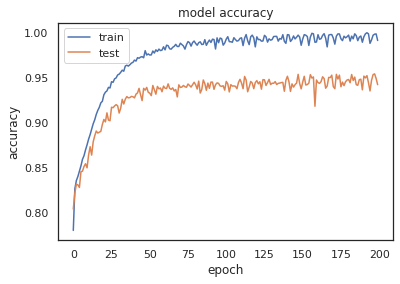

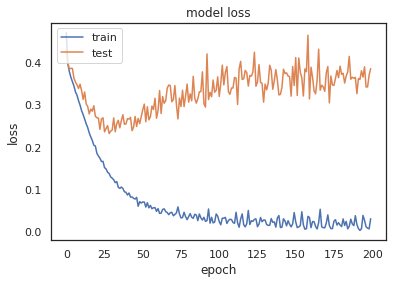

In [352]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Evaluation the results of model with Test dataset

In [353]:
results = model.evaluate(x_test, y_test)
results

749/749 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.9424


[0.37402209639549255, 0.9424313306808472]